In [4]:
# 3.4.1 IMDB 데이터셋
# Internet Movie Database의 데이터로 리뷰 5만 개로 이루어져 있다.
# 데이터 셋은 train set 2만 5천개와 test set 2만 5천개로 나뉘어 있고 50% 부정, 50% 긍정 리뷰로 구성되어 있다.

# 데이터 셋 로드
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
                                                                      # num_words = 10000은 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만
                                                                      #             사용하겠다는 의미.
                                                                      # _labels : 0 = 부정, 1 = 긍정
print(train_data[0])
print(train_labels[0])

Using TensorFlow backend.


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [5]:
# 3.4.2 데이터 준비
# 리스트를 텐서로 바꾸는 방법
# (1) 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다.
#     그리고 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용한다.
# (2) 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환한다.
#     그 후, 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용한다.
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만든다.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만든다.
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# 3.4.3 신경망 모델 만들기
# (1) 얼마나 많은 층을 사용할 것인가?
# (2) 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

# 활성화 함수 사용 이유? : 가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
# 객체를 직접 만들어 전달
# from keras import optimizers
# from keras import losses
# from keras import metrics
# model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
#              loss = losses.binary_crossentropy,
#              metrics = [metrics.binary_accuracy])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# 3.4.4 훈련 검증

# 검증 세트 준비하기
x_val = x_train[ : 10000]
partial_x_train = x_train[10000 : ]
y_val = y_train[ : 10000]
partial_y_train = y_train[10000 : ]

# 모델 훈련하기
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 29s 2ms/step - loss: 0.4976 - acc: 0.7951 - val_loss: 0.3718 - val_acc: 0.8718
Epoch 2/20
15000/15000 [==============================] - 10s 657us/step - loss: 0.2958 - acc: 0.9045 - val_loss: 0.2991 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 7s 494us/step - loss: 0.2160 - acc: 0.9285 - val_loss: 0.3081 - val_acc: 0.8721
Epoch 4/20
15000/15000 [==============================] - 7s 461us/step - loss: 0.1740 - acc: 0.9435 - val_loss: 0.2828 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 7s 482us/step - loss: 0.1413 - acc: 0.9542 - val_loss: 0.2862 - val_acc: 0.8853
Epoch 6/20
15000/15000 [==============================] - 9s 569us/step - loss: 0.1142 - acc: 0.9653 - val_loss: 0.3103 - val_acc: 0.8808
Epoch 7/20
15000/15000 [==============================] - 8s 524us/step - 

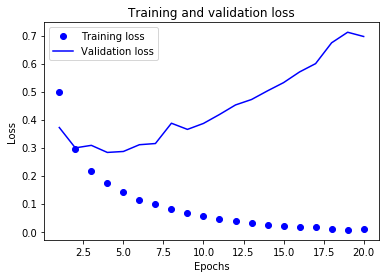

In [9]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)  + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss") # bo는 파란색 점
plt.plot(epochs, val_loss, 'b', label = "Validation loss") # b는 파란색 실선
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

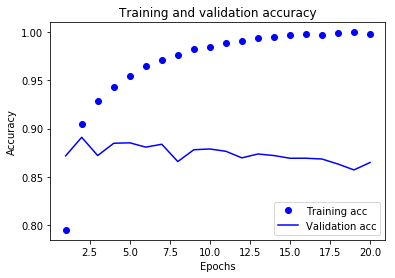

In [10]:
# 훈련과 검증 정확도 그리기
plt.clf() # 그래프를 초기화 한다.
acc = history_dict["acc"]
val_acc = histroy_dict["val_acc"]

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# 네 번째 epoch에서 그래프가 역전 된다.
# 이유? : 과대적합으로 판단

In [11]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

results # 약 87%의 정확도를 달성했다.

Epoch 1/4
25000/25000 [==============================] - 18s 735us/step - loss: 0.4751 - acc: 0.8213
Epoch 2/4
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2655 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 18s 730us/step - loss: 0.1984 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 25s 994us/step


[0.32026989517688753, 0.87396]

In [12]:
# 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기
model.predict(x_test)

array([[0.13978592],
       [0.9997106 ],
       [0.3210915 ],
       ...,
       [0.0749366 ],
       [0.04470742],
       [0.4785372 ]], dtype=float32)